![Logo UAH](https://fen.uahurtado.cl/wp-content/uploads/2019/01/logo-fen-2018-860x120-1.png "Logo UAH")
# <center>Trabajo 2
#### **Nombre** : Juan Licanqueo

Use los datos la base de datos que estamos usando en el curso.
1. Escoja dos empresas de la base de datos, de diferente sector industrial. Cualquiera.
2. Gráfique para cada una la densidad de su razón corriente, que puede advertir de cada empresa.
3. Tome las variables: 
Capital circulante (Capital de trabajo)/Activos Totales.
Beneficios no distribuidos /Activos Totales.
EBITDA/Activos Totales
Valor contable Patrimonio (Capitalización bursátil)/Pasivo Total
Ventas Netas/Activos Totales
Gráfique sus densidades y series de tiempo, desestacionalice. ¿Qué puede decir de las empresas analizadas?¿Cómo está el desempeño en el tiempo?
4. Calcule el z-score de Altman. Vea su desempeño como serie de tiempo. ¿En cuál de las dos invertiría dinero?¿Y por qué motivo?

### Cargamos los modulos a usar.

In [6]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### Definimos nuestro directorio de trabajo.

In [7]:
os.chdir('/Users/Juan/Desktop/analis_estadistico_2/Trabajo_02')
os.getcwd()

'C:\\Users\\Juan\\Desktop\\analis_estadistico_2\\Trabajo_02'

### Cargamos la base de datos.

In [8]:
datos = pd.read_csv('dataset_chile_rev04.csv', sep = ',', header = 0)

C:\Users\Juan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (68) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Visualizamos los datos cargados.

In [9]:
datos.head(3)

,year,quarter,tic_bolsa,tic,nombre,rut,naic,deprecamor,caflfrusop,incometax,...,txdust,diinotccob,liabilityequity,nctrot,capitabursatil,economatica,rut_n,rut_b,n_quarter,date
0,2009,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,14917.68900,NaN,3860.95510,...,0.000,NaN,434260.030,0.0,310565.66236,Fondos,NaN,980000001,12,200912
1,2004,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,553.47302,NaN,911.87903,...,0.000,NaN,61398.859,0.0,114488,Fondos,NaN,980000001,12,200412
2,2020,12,AFPCAPITAL<XSGO>,AFPCAPITAL,A.F.P. Capital S.A.,98000000-1,Fondos de pensión de empleados,4789.70510,NaN,20084.46500,...,18883.064,NaN,611868.690,0.0,780941.8755,Fondos,NaN,980000001,12,202012


### Verificamos la dimensión del dataframe.

In [10]:
datos.shape

(41976, 74)

#### <center>*La base de datos contiene 74 variables(columnas) y 41.976 registros(filas).*

### Guardamos en una variable la cantidad de columnas del dataframe.

In [11]:
datos_col1 = datos.shape[1]
datos_col1

74

### Verificamos el rango de fechas y cuantos registros hay por cada uno.

In [12]:
datos.year.value_counts().sort_index()

2000    1908
2001    1908
2002    1908
2003    1908
2004    1908
2005    1908
2006    1908
2007    1908
2008    1908
2009    1908
2010    1908
2011    1908
2012    1908
2013    1908
2014    1908
2015    1908
2016    1908
2017    1908
2018    1908
2019    1908
2020    1908
2021    1908
Name: year, dtype: int64

### Generamos un grafico de barra para visualizar los datos faltantes por cada variable.

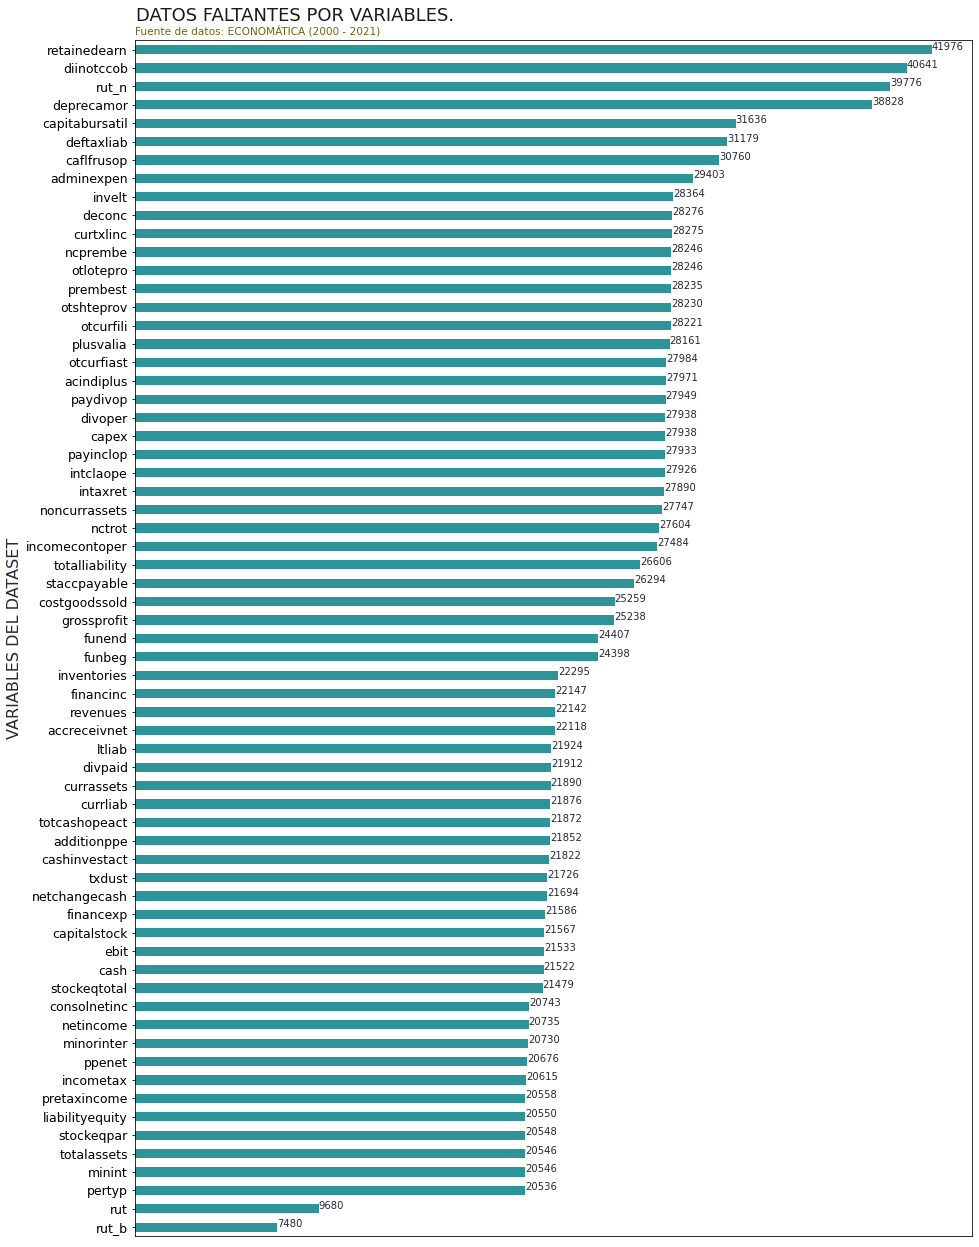

In [13]:
datos.isnull().sum().sort_values(ascending = True).loc['rut_b':].plot(kind = 'barh',
                                                       figsize = (15,22),
                                                        legend = None,
                                                         color = '#2D9499')

# plt.xticks(rotation = 45,
#           fontsize = 12)
plt.xticks([])
plt.yticks(fontsize = 12.5)

plt.suptitle('DATOS FALTANTES POR VARIABLES.',
            color = '#1C191C',
            fontsize = 18,
            ha = 'left',
            x = 0.126,
            y = 0.901)

plt.title('Fuente de datos: ECONOMÁTICA (2000 - 2021)',
         color = '#70680F',
         fontsize = 10.5,
         loc = 'left')

# plt.xlabel('CANTIDAD DE DATOS FALTANTES',
#           fontsize = 16,
#            color = '#272738')

plt.ylabel('VARIABLES DEL DATASET',
          fontsize = 16,
           color = '#272738')

for i,v in enumerate(datos.isnull().sum().sort_values(ascending = True).loc['rut_b':]):
    plt.text(v+1,
            i,
            str(v),
            color = '#272738')
plt.show()


#### <center>*Se visualizan gran cantidad de valores faltantes, la variable que más acumula es RETAINEDEARN, además se excluyeron de gráfico de barra las variables que no tienen valores nulos.*

### Veremos los tipos de datos para normalizar las variables que esten mal asignadas.

In [14]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41976 entries, 0 to 41975
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             41976 non-null  int64  
 1   quarter          41976 non-null  int64  
 2   tic_bolsa        41976 non-null  object 
 3   tic              41976 non-null  object 
 4   nombre           41976 non-null  object 
 5   rut              32296 non-null  object 
 6   naic             41976 non-null  object 
 7   deprecamor       3148 non-null   float64
 8   caflfrusop       11216 non-null  float64
 9   incometax        21361 non-null  float64
 10  ebit             20443 non-null  float64
 11  pertyp           21440 non-null  float64
 12  capex            14038 non-null  float64
 13  accreceivnet     19858 non-null  float64
 14  acindiplus       14005 non-null  float64
 15  additionppe      20124 non-null  float64
 16  adminexpen       12573 non-null  float64
 17  capitalstock

### Analizar porque la variable CAPITABURSATIL es de tipo objeto. 

In [15]:
datos.capitabursatil.value_counts()

-               7600
30000              5
1515.578847        5
675492.03025       4
60000              4
                ... 
349733.736         1
3760000            1
310565.66236       1
210249.6536        1
52985.695291       1
Name: capitabursatil, Length: 2619, dtype: int64

### Eliminaremos los registros ' - ' para hacer la conversión a dato tipo float.

In [16]:
datos.capitabursatil = datos.capitabursatil.replace('-', np.nan)

### Reemplazaremos el '.' por vacio porque el dato es un valor entero pero lo dejaremos como tipo float.

In [17]:
datos.capitabursatil = datos.capitabursatil.str.replace('.', '').astype(float)

<ipython-input-17-bda4b6c75bdb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  datos.capitabursatil = datos.capitabursatil.str.replace('.', '').astype(float)


### Verificamos que la variable fue reemplazada con exito.

In [18]:
datos.capitabursatil.head()

0    3.105657e+10
1    1.144880e+05
2    7.809419e+09
3    4.975389e+10
4    4.119749e+10
Name: capitabursatil, dtype: float64

### Cambiaremos el tipo de dato de float a string de la variable RUT_N.

In [19]:
datos.rut_n = datos.rut_n.astype(str) 

### Calcúlo de indicadores económicos.

In [20]:
datos = datos.assign(\
                                       razon_de_liquidez = lambda x:(x['currassets'] / x['currliab']),\
                                            prueba_acida = lambda x:(x['currassets'] - x['inventories'])/x['currliab'],\
                                      capital_de_trabajo = lambda x:(x['currassets'] - x['currliab']),\
                             rotacion_de_activos_totales = lambda x:(x['revenues'] / x['totalassets']),\
                             rotacion_capital_de_trabajo = lambda x:(x['revenues'] / x['capital_de_trabajo']),\
                                 rotacion_de_inventarios = lambda x:(x['costgoodssold'] / x['inventories']),\
                          rotacion_de_cuentas_por_cobrar = lambda x:(x['revenues']/x['deconc']),\
               rotacion_de_cuentas_por_pagar_proveedores = lambda x:(x['costgoodssold']/x['staccpayable']),\
                                     dias_de_inventario  = lambda x:(365/x['rotacion_de_inventarios']),\
                               dias_de_cuenta_por_cobrar = lambda x:(365/x['rotacion_de_cuentas_por_cobrar']),\
                                dias_de_cuenta_por_pagar = lambda x:(365/x['rotacion_de_cuentas_por_pagar_proveedores']),\
                                           endeudamiento = lambda x:(x['totalliability']/x['totalassets']),\
                          deuda_de_largo_plazo_a_activos = lambda x:(x['totalliability']/x['ltliab']),\
                                          apalancamiento = lambda x:(x['totalliability']/x['stockeqtotal']),\
                            multiplicador_del_patrimonio = lambda x:(x['totalassets']/x['stockeqtotal']),\
                                  cobertura_de_intereses = lambda x:(x['ebit']/x['financexp']),\
                                   flujo_de_caja_a_deuda = lambda x:(x['totcashopeact']/x['totalliability']),\
                                            margen_bruto = lambda x:(x['grossprofit']/x['revenues']),\
                                      margen_operacional = lambda x:(x['ebit']/x['revenues']),\
                      margen_utilidad_antes_de_impuestos = lambda x:(x['pretaxincome']/x['revenues']),\
                                             margen_neto = lambda x:(x['netincome']/x['revenues']),\
                                 retorno_neto_de_activos = lambda x:(x['netincome']/x['totalassets']),\
                                                     ROE = lambda x:(x['netincome']/x['stockeqtotal']),\
           Utilidad_neta_div_Utilidad_antes_de_impuestos = lambda x:(x['netincome']/x['pretaxincome']),\
    Utilidad_antes_de_impuestos_div_Utilidad_operacional = lambda x:(x['pretaxincome']/x['ebit']),\
                         Utilidad_operacional_div_Ventas = lambda x:(x['ebit']/x['revenues']),\
                                         ciclo_operativo = lambda x:(x['dias_de_inventario']/x['dias_de_cuenta_por_cobrar']),\
                                              ciclo_caja = lambda x:(x['ciclo_operativo'] - x['dias_de_cuenta_por_pagar']),\
            )

### Verificaremos la cantidad de variables nuevas creadas como indicadores.

In [21]:
datos_NuCol = datos.shape[1] - datos_col1
print('Se calcularon {} indicadores para evaluar a las empresas'.format(datos_NuCol))

Se calcularon 28 indicadores para evaluar a las empresas


#### <center>*Se crearon 28 nuevas variables para realizar comparaciones de indicadores económicos.* 

### Reemplazamos los valores que hubieran resultado infinito de las nuevas variables calculadas con NAN. 

In [22]:
datos.replace([np.inf, -np.inf], np.nan, inplace = True)

### Seleccionaremos 2 empresas de diferente sector industrial.

In [23]:
Cant_EmpxSect = datos.groupby('naic').agg({'tic' : pd.Series.nunique}).sort_values(by = 'tic').reset_index()
Cant_EmpxSect[list(Cant_EmpxSect.tic).index(10):].set_axis(['Sector_Económico', 'Cantidad_Empresas'], axis = 1)

,Sector_Económico,Cantidad_Empresas
89,Industria de las bebidas,10
90,Servicios relacionados con el transporte por agua,10
91,Grandes almacenes,10
92,Inmobiliarias y corredores de bienes raíces,11
93,"Agua, alcantarrillado y otros sistemas",13
94,Alquiler sin intermediación de bienes raíces,13
95,Instituciones financieras de fomento económico,14
96,Servicios relacionados con los servicios inmob...,16
97,Servicios relacionados con el transporte por c...,17
98,Bancos,18


### La primera empresa seleccionada sera de sector 'Generación, transmisión y suministro de energía eléctrica'.

In [24]:
pd.DataFrame(datos[datos.naic == 'Generación, transmisión y suministro de energía eléctrica']['tic'].unique()).\
                                                                                set_axis(['Empresa_1'], axis = 1)

,Empresa_1
0,AESANDES
1,CELEO
2,CHILQUINTA
3,COLBUN
4,LITORAL
5,CGE
6,PUNTILLA
7,COCHRANESPA
8,ELEFRONTERA
9,EDELMAG


In [25]:
ENELDXCH = datos[datos['tic'] == 'ENELDXCH'].sort_values('date')

#### <center> *De este rubro seleccionaremos la empresa ENELDXCH, que es la filial de Enel Chile dedicada al negocio de la distribución eléctrica en sus operaciones en el país.*

### La segunda empresa seleccionada sera de sector 'Agua, alcantarrillado y otros sistemas'.

In [26]:
pd.DataFrame(datos[datos.naic == 'Agua, alcantarrillado y otros sistemas']['tic'].unique()).\
                                                                                set_axis(['Empresa_2'], axis = 1)

,Empresa_2
0,AGUAS-A
1,AGUASCORDILLERA
2,AGUASANTOFA
3,AMAG
4,AGUASMANQUEHUE
5,AGUASNUEVAS
6,ESSAL-B
7,ESAN
8,SSLAGOPENU
9,ESSBIO-C


In [27]:
AGUAS_A = datos[datos['tic'] == 'AGUAS-A'].sort_values('date')

#### <center> *De este rubro seleccionaremos la empresa AGUAS-A, que es Aguas Andinas empresa de servicios sanitarios, que realiza el suministro de agua potable y alcantarillado en gran parte de la ciudad de Santiago.*

### Realizaremos los gráficos de densidad de cada empresa con respecto a la variable Razón de Liquidez.

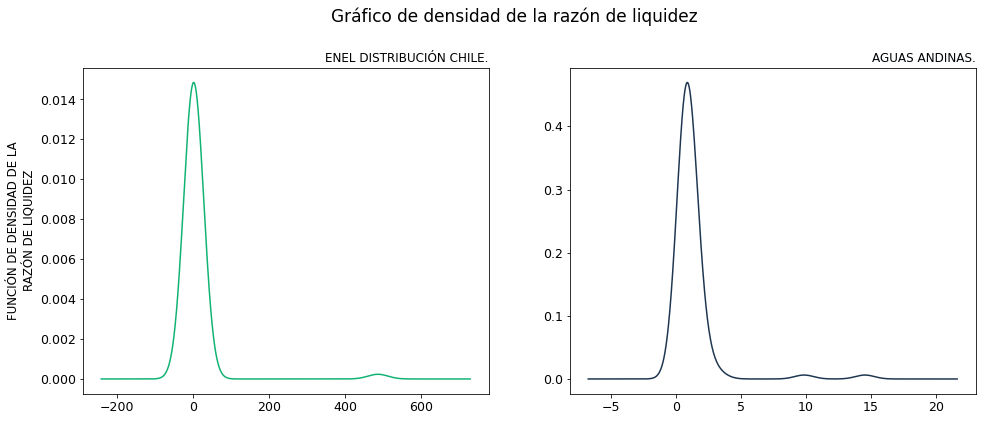

In [28]:
plt.figure(figsize=(16,6))

plt.suptitle('Gráfico de densidad de la razón de liquidez',
          fontsize = 17,
             ha = 'center',
              y = 1.02)

# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

plt.subplot(1,2,1)

ENELDXCH.razon_de_liquidez.plot.density(
                               color = '#10B374',
                               fontsize = 12.5,)

plt.title('ENEL DISTRIBUCIÓN CHILE.',
          fontsize = 12,
          loc = 'right',
         )

plt.ylabel('FUNCIÓN DE DENSIDAD DE LA\nRAZÓN DE LIQUIDEZ',
          fontsize = 11.8
          )

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

plt.subplot(1,2,2)

AGUAS_A.razon_de_liquidez.plot.density(
                               color = '#1E3650',
                               fontsize = 12.5,)

plt.title('AGUAS ANDINAS.',
          color = '#000407',
          fontsize = 12,
          loc = 'right',
         )

plt.ylabel(None)

plt.show()

#### <center> *Para los indicadores de razón de liquidez de ENEL DISTRIBUCIÓN CHILE observamos que el peak es bajo en comparación con el de AGUAS ANDINAS, el peak para ENEL se ubica cercano al 0 mientras AGUAS ANDINAS esta más cerca de 1.*

### Generaremos las siguientes variables Capital Circulante, Rentabilidad sobre Activos Totales, Valor Contable del Patrimonio y Ventas sobre Activos Totales.

In [29]:
datos = datos.assign(\
                              cap_circ = lambda x:(x['capital_de_trabajo'] / x['totalassets']),\
                          rent_act_tot = lambda x:(x['ebit'])/x['totalassets'],\
                          val_cont_pat = lambda x:(x['stockeqtotal'] / x['totalliability']),\
                          vent_act_tot = lambda x:(x['revenues'] / x['totalassets'])
                    )

#### <center> *Nota: la variable Beneficios no Distribuidos por Activos Totales no sera considerada ya que sus valores son 0*

### Reemplazamos los valores que hubieran resultado infinito de las nuevas variables calculadas con NAN. 

In [30]:
datos.replace([np.inf, -np.inf], np.nan, inplace = True)

### Agregaremos las nuevas variables a las empresas ya selecionadas.

In [31]:
ENELDXCH = datos[datos['tic'] == 'ENELDXCH'].sort_values('date')
AGUAS_A = datos[datos['tic'] == 'AGUAS-A'].sort_values('date')

### Gráficaremos las funciones de densidad de la empresa seleccionadas por cada una de las nuevas variables.

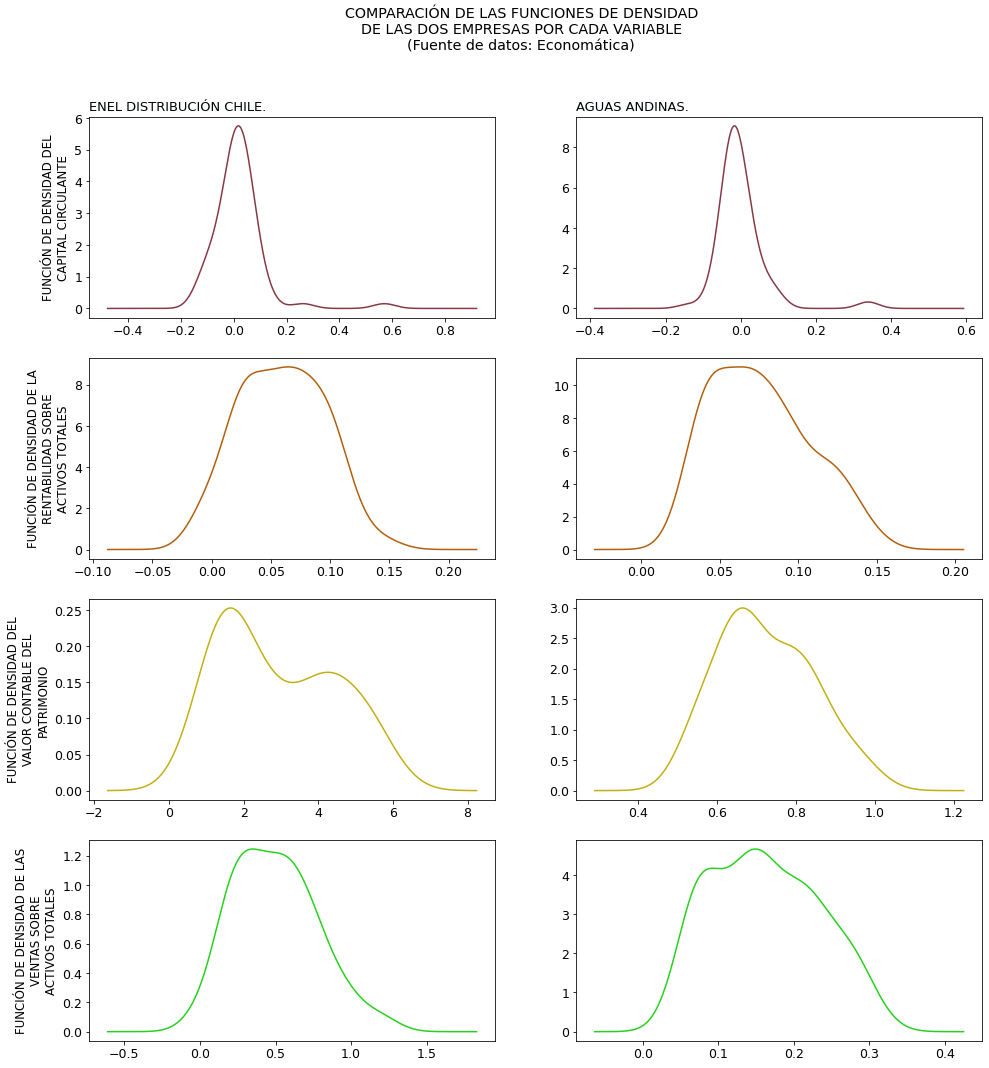

In [32]:
plt.figure(figsize=(16,17))

plt.suptitle('COMPARACIÓN DE LAS FUNCIONES DE DENSIDAD\nDE LAS DOS EMPRESAS POR CADA VARIABLE\n(Fuente de datos: Economática)',
            fontsize = 14.3,
            y = 0.97)
# ---------------------------------------------------------------------------------------------
# CAPITAL CIRCULANTE
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

plt.subplot(4,2,1)

ENELDXCH.cap_circ.plot.density(color = '#873845',
                               fontsize = 12.5)

plt.title('ENEL DISTRIBUCIÓN CHILE.',
          color = '#000407',
          fontsize = 13,
          loc = 'left')

plt.ylabel('FUNCIÓN DE DENSIDAD DEL\nCAPITAL CIRCULANTE',
          fontsize = 11.8)
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

plt.subplot(4,2,2)

AGUAS_A.cap_circ.plot.density(color = '#873845',
                              fontsize = 12.5)

plt.title('AGUAS ANDINAS.',
          color = '#000407',
          fontsize = 13,
          loc = 'left')

plt.ylabel(None)

# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

plt.subplot(4,2,3)

ENELDXCH.rent_act_tot.plot.density(color = '#B35E0B',
                                fontsize = 12.5)

plt.ylabel('FUNCIÓN DE DENSIDAD DE LA\nRENTABILIDAD SOBRE\nACTIVOS TOTALES',
            fontsize = 11.8)

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

plt.subplot(4,2,4)

AGUAS_A.rent_act_tot.plot.density(color = '#B35E0B',
                               fontsize = 12.5)
plt.ylabel(None)
# ---------------------------------------------------------------------------------------------
# VALOR CONTABLE DEL PATRIMONIO.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

plt.subplot(4,2,5)

ENELDXCH.val_cont_pat.plot.density(color = '#C2B010',
                               fontsize = 12.5)

plt.ylabel('FUNCIÓN DE DENSIDAD DEL\nVALOR CONTABLE DEL\nPATRIMONIO',
          fontsize = 11.8)

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

plt.subplot(4,2,6)

AGUAS_A.val_cont_pat.plot.density(color = '#C2B010',
                               fontsize = 12.5,)
plt.ylabel(None)
# ---------------------------------------------------------------------------------------------
# VENTAS SOBRE ACTIVOS TOTALES.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

plt.subplot(4,2,7)

ENELDXCH.vent_act_tot.plot.density(color = '#25D11D',
                               fontsize = 12.5)

plt.ylabel('FUNCIÓN DE DENSIDAD DE LAS\nVENTAS SOBRE\nACTIVOS TOTALES',
          fontsize = 11.8)

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

plt.subplot(4,2,8)

AGUAS_A.vent_act_tot.plot.density(color = '#25D11D',
                               fontsize = 12.5)
plt.ylabel(None)

plt.show()

#### <center> *La función de densidad del indicador CAPITAL CIRCULANTE nos muestra un comportamiento similar para las dos empresas, pero el peak alcanzado por AGUAS ANDINAS es mayor.En la función de RENTABILIDAD SOBRE ACTIVOS TOTALES, es AGUAS ANDINAS el que tiene mejor rentabilidad y mayor peak. En términos de PATRIMONIO la función de densidad AGUAS ANDINA es más estable y tiene números positivos en cambio ENEL tiene dos peak y números negativos. Y en VENTAS SOBRE ACTIVOS TOTALES vemos que el área bajo la curva es mayor en AGUAS ANDINAS además tiene un mayor peak y un rango positivo.*

### Gráficaremos las series de tiempo de cada una de las empresas por cada variable nueva.

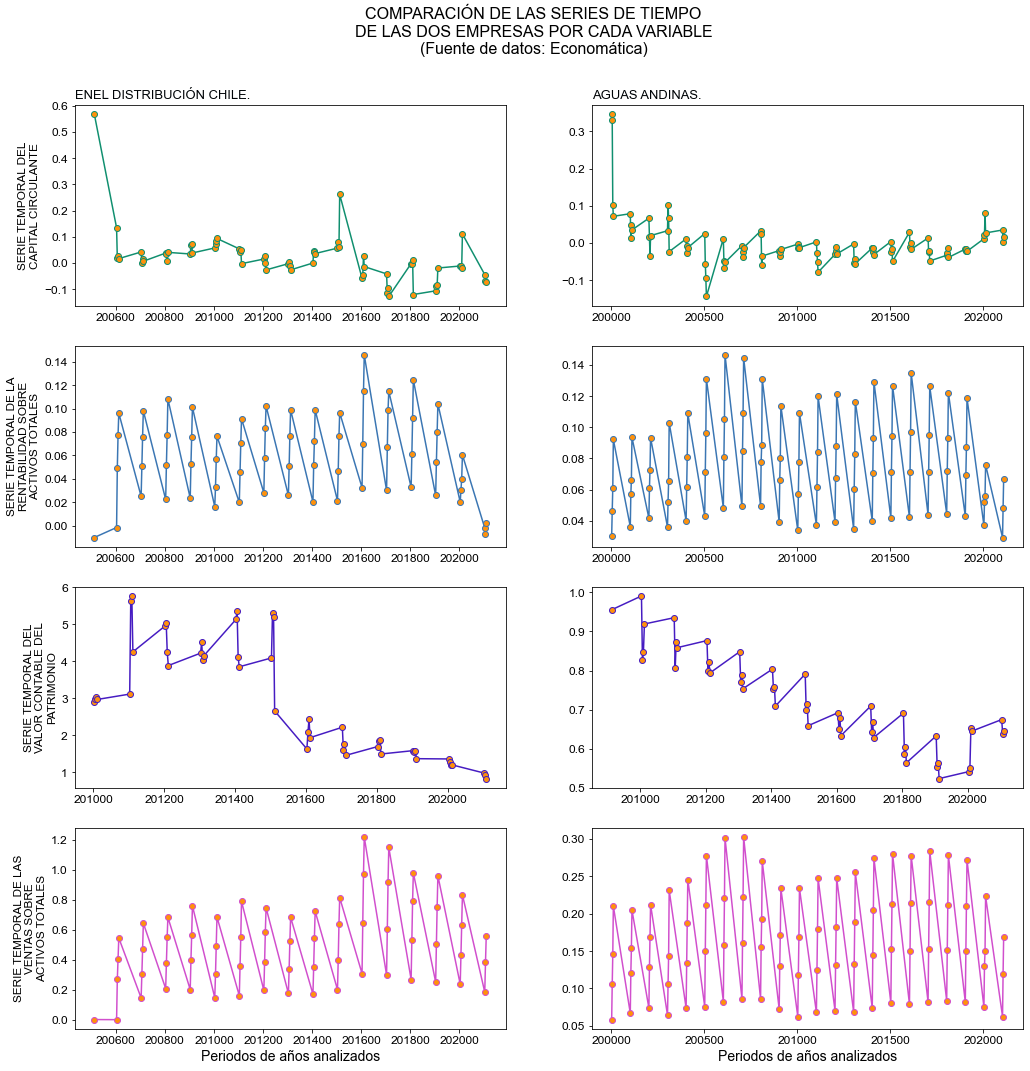

In [33]:
fig, axes = plt.subplots(4,2, figsize = (17,17))

fig.suptitle('COMPARACIÓN DE LAS SERIES DE TIEMPO\nDE LAS DOS EMPRESAS POR CADA VARIABLE\n(Fuente de datos: Economática)',
            fontsize = 16,
            y = 0.96)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# CAPITAL CIRCULANTE
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

ENELDXCH.plot('date', 
              'cap_circ',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#108F6F',
               legend = None,
               fontsize = 12,
               ax = axes[0,0]
              )
axes[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
          color = '#000407',
          fontsize = 13,
          loc = 'left'
         )

axes[0,0].set_xlabel(None)

axes[0,0].set_ylabel('SERIE TEMPORAL DEL\nCAPITAL CIRCULANTE',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

AGUAS_A.plot('date', 
              'cap_circ',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#108F6F',
               legend = None,
               fontsize = 12,
               ax = axes[0,1]
              )

axes[0,1].set_title('AGUAS ANDINAS.',
          color = '#000407',
          fontsize = 13,
          loc = 'left',
         )
axes[0,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

ENELDXCH.plot('date', 
              'rent_act_tot',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#3B76B3',
               legend = None,
               fontsize = 12,
               ax = axes[1,0]
              )
axes[1,0].set_xlabel(None)

axes[1,0].set_ylabel('SERIE TEMPORAL DE LA\nRENTABILIDAD SOBRE\nACTIVOS TOTALES',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

AGUAS_A.plot('date', 
              'rent_act_tot',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#3B76B3',
               legend = None,
               fontsize = 12,
               ax = axes[1,1]
              )
axes[1,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# VALOR CONTABLE DEL PATRIMONIO.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

ENELDXCH.plot('date', 
              'val_cont_pat',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#461CC2',
               legend = None,
               fontsize = 12,
               ax = axes[2,0]
              )

axes[2,0].set_xlabel(None)

axes[2,0].set_ylabel('SERIE TEMPORAL DEL\nVALOR CONTABLE DEL\nPATRIMONIO',
                     fontsize = 11.8
                    )

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

AGUAS_A.plot('date', 
              'val_cont_pat',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#461CC2',
               legend = None,
               fontsize = 12,
               ax = axes[2,1]
              )
axes[2,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# VENTAS SOBRE ACTIVOS TOTALES.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

ENELDXCH.plot('date', 
              'vent_act_tot',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#D14FCD',
               legend = None,
               fontsize = 12,
               ax = axes[3,0]
              )

axes[3,0].set_xlabel('Periodos de años analizados',
                     fontsize = 14)

axes[3,0].set_ylabel('SERIE TEMPORAL DE LAS\nVENTAS SOBRE\nACTIVOS TOTALES',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

AGUAS_A.plot('date', 
              'vent_act_tot',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#D14FCD',
               legend = None,
               fontsize = 12,
               ax = axes[3,1]
              )

axes[3,1].set_xlabel('Periodos de años analizados',
                     fontsize = 14)


plt.show()

#### <center> *La serie temporal para el indicador CAPITAL CIRCULANTE el comportamiento es similar para ambas empresas, para la RENTABILIDAD SOBRE ACTIVOS TOTALES vemos que para ambos es ciclico alcanzando mejores niveles en AGUAS ANDINAS, en el VALOR CONTABLE DEL PATRIMONIO obervamos una clara tendencia a la baja de AGUAS ANDINAS en cambio ENEL presenta dos periodos uno mas estable y luego con una marcada tendencia a la baja, y finalmente para las VENTAS SOBRE ACTIVOS TOTALES es ciclico para ambos logrando mejores números ENEL.*

### Guardaremos en variables las descomposiciones de la series temporales de los indicadores antes vistos de cada empresa.

In [34]:
# ---------------------------------------------------------------------------------------------
# Descomposición estacional del Capital Circulante.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
DE_ENE_CC = sm.tsa.seasonal_decompose(ENELDXCH.set_index('date').cap_circ.dropna(),
                                    model = 'additive', period = 4)
# AGUAS ANDINAS
DE_AGUAS_CC = sm.tsa.seasonal_decompose(AGUAS_A.set_index('date').cap_circ.dropna(),
                                       model = 'additive', period = 4) 

# ---------------------------------------------------------------------------------------------
# Descomposición estacional de la Rentabilidad sobre Activos Totales.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
DE_ENE_RAT = sm.tsa.seasonal_decompose(ENELDXCH.set_index('date').rent_act_tot.dropna(),
                                    model = 'additive', period = 4)
# AGUAS ANDINAS
DE_AGUAS_RAT = sm.tsa.seasonal_decompose(AGUAS_A.set_index('date').rent_act_tot.dropna(),
                                       model = 'additive', period = 4) 

# ---------------------------------------------------------------------------------------------
# Descomposición estacional del Valor Contable del Patrimonio.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
DE_ENE_VCP = sm.tsa.seasonal_decompose(ENELDXCH.set_index('date').val_cont_pat.dropna(),
                                    model = 'additive', period = 4)
# AGUAS ANDINAS
DE_AGUAS_VCP = sm.tsa.seasonal_decompose(AGUAS_A.set_index('date').val_cont_pat.dropna(),
                                       model = 'additive', period = 4) 

# ---------------------------------------------------------------------------------------------
# Descomposición estacional de las Ventas Sobre Activos Totales.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
DE_ENE_VAT = sm.tsa.seasonal_decompose(ENELDXCH.set_index('date').vent_act_tot.dropna(),
                                    model = 'additive', period = 4)
# AGUAS ANDINAS
DE_AGUAS_VAT = sm.tsa.seasonal_decompose(AGUAS_A.set_index('date').vent_act_tot.dropna(),
                                       model = 'additive', period = 4) 

### Gráficaremos cada componente de la descomposición por cada indicador de las dos empresas.

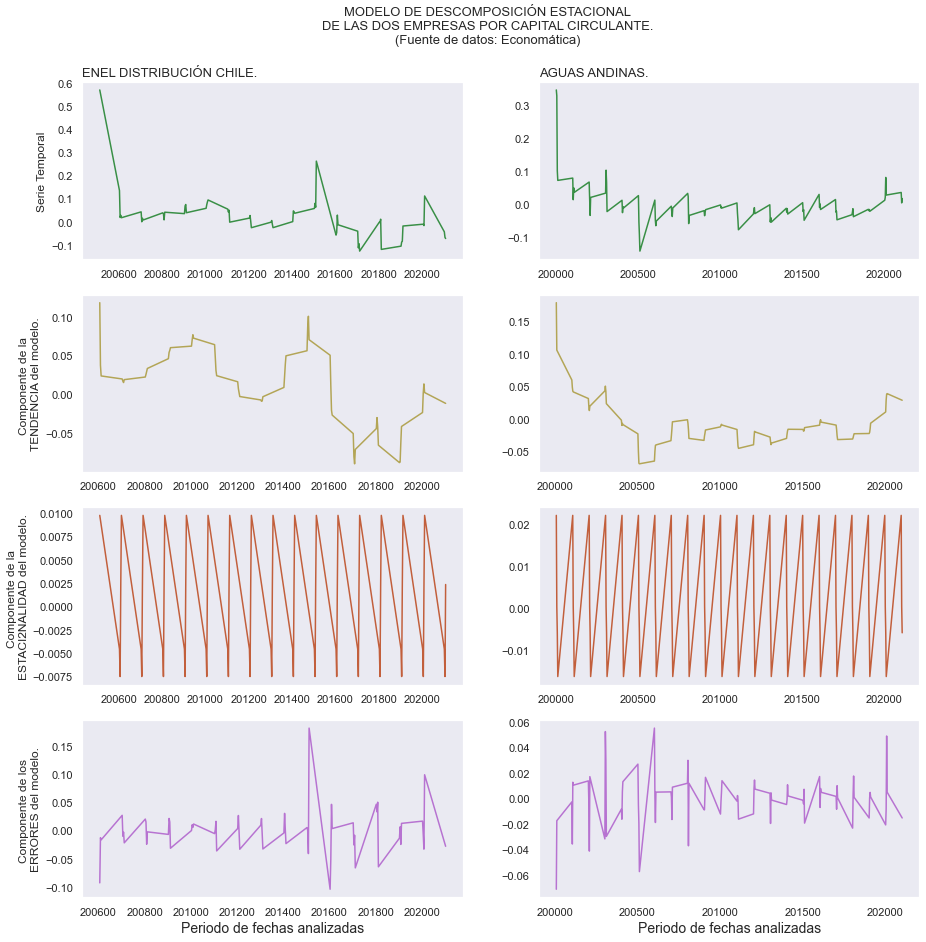

In [35]:
fig, axs = plt.subplots(4,2, figsize = (15, 15))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LAS DOS EMPRESAS POR CAPITAL CIRCULANTE.\n(Fuente de datos: Economática)',
            fontsize = 13,
             y = 0.95,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# CAPITAL CIRCULANTE
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

ENELDXCH.set_index('date').cap_circ.dropna().plot(color = '#398F46',
                                                          ax = axs[0,0],
                                                          fontsize = 11)

axs[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,0].set_xlabel(None)

axs[0,0].set_ylabel('Serie Temporal',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_ENE_CC.trend.plot(color  = '#B3A556',
                         ax = axs[1,0],
                   fontsize = 11)

axs[1,0].set_xlabel(None)

axs[1,0].set_ylabel('Componente de la \nTENDENCIA del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_ENE_CC.seasonal.plot(color  = '#C25F3C',
                            ax = axs[2,0],
                      fontsize = 11)

axs[2,0].set_xlabel(None)

axs[2,0].set_ylabel('Componente de la \nESTACI2NALIDAD del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_ENE_CC.resid.plot(color  = '#B773D1',
                         ax = axs[3,0],
                   fontsize = 11)

axs[3,0].set_ylabel('Componente de los \nERRORES del modelo.',
                 fontsize = 12)

axs[3,0].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)
# ---------------------------------------------------------------------------------------------
# CAPITAL CIRCULANTE
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

AGUAS_A.set_index('date').cap_circ.dropna().plot(color = '#398F46',
                                                        ax = axs[0,1],
                                                  fontsize = 11)

axs[0,1].set_title('AGUAS ANDINAS.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,1].set_xlabel(None)

axs[0,1].set_ylabel(None)

# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_AGUAS_CC.trend.plot(color  = '#B3A556',
                           ax = axs[1,1],
                     fontsize = 11)

axs[1,1].set_xlabel(None)

axs[1,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_AGUAS_CC.seasonal.plot(color  = '#C25F3C',
                              ax = axs[2,1],
                        fontsize = 11)

axs[2,1].set_xlabel(None)

axs[2,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_AGUAS_CC.resid.plot(color  = '#B773D1',
                           ax = axs[3,1],
                     fontsize = 11)

axs[3,1].set_xlabel(None)

axs[3,1].set_ylabel(None)

axs[3,1].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)

plt.show()

#### <center> *La descomposición estacional del CAPITAL CIRCULANTE nos entrega la siguiente información, con respecto a la tendencia para la empresa AGUAS ANDINA es a la baja y muy parecida a la serie temporal no asi en ENEL en el cual se observa distintas alzas, la estacionalidad para ambas es perfecta, en los errores el modelo de ENEL se equivoca más a partir del 2016 y AGUAS ANDINAS durante los primeros años.*

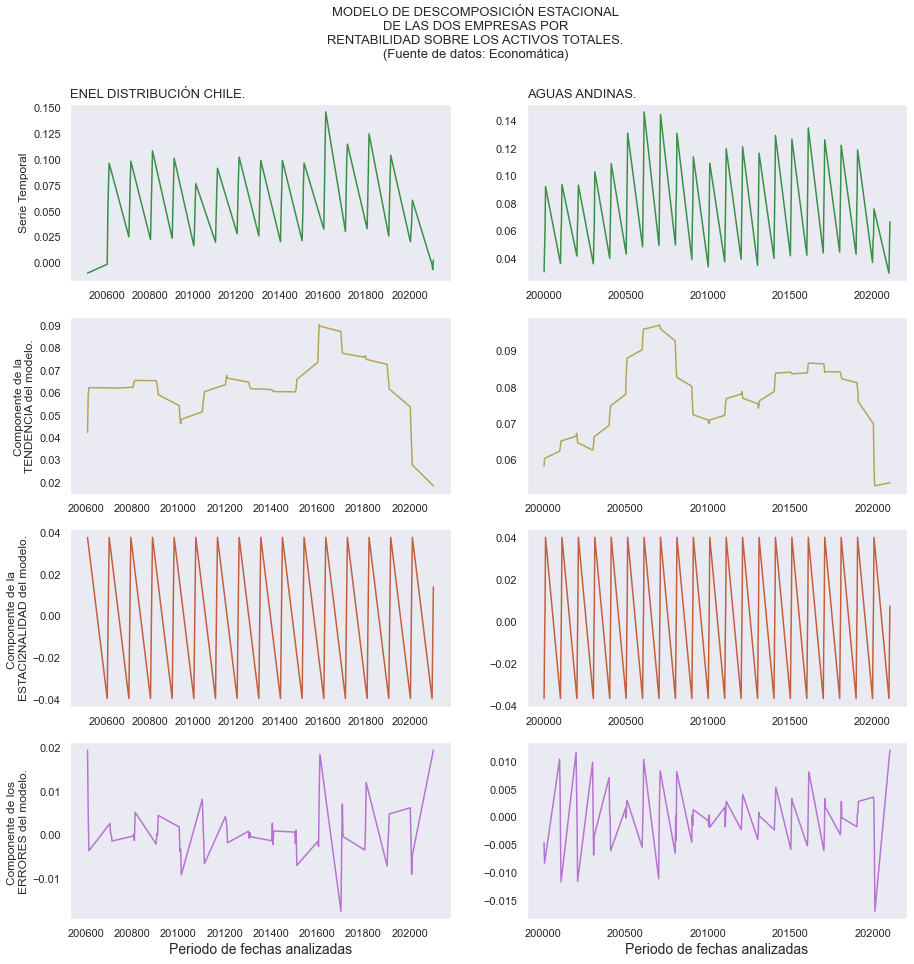

In [36]:
fig, axs = plt.subplots(4,2, figsize = (15, 15))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LAS DOS EMPRESAS POR\nRENTABILIDAD SOBRE LOS ACTIVOS TOTALES.\n(Fuente de datos: Economática)',
            fontsize = 13,
             y = 0.97,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

ENELDXCH.set_index('date').rent_act_tot.dropna().plot(color = '#398F46',
                                                          ax = axs[0,0],
                                                          fontsize = 11)

axs[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,0].set_xlabel(None)

axs[0,0].set_ylabel('Serie Temporal',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_ENE_RAT.trend.plot(color  = '#B3A556',
                         ax = axs[1,0],
                   fontsize = 11)

axs[1,0].set_xlabel(None)

axs[1,0].set_ylabel('Componente de la \nTENDENCIA del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_ENE_RAT.seasonal.plot(color  = '#C25F3C',
                            ax = axs[2,0],
                      fontsize = 11)

axs[2,0].set_xlabel(None)

axs[2,0].set_ylabel('Componente de la \nESTACI2NALIDAD del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_ENE_RAT.resid.plot(color  = '#B773D1',
                         ax = axs[3,0],
                   fontsize = 11)

axs[3,0].set_xlabel(None)

axs[3,0].set_ylabel('Componente de los \nERRORES del modelo.',
                 fontsize = 12)

axs[3,0].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)
# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

AGUAS_A.set_index('date').rent_act_tot.dropna().plot(color = '#398F46',
                                                        ax = axs[0,1],
                                                  fontsize = 11)

axs[0,1].set_title('AGUAS ANDINAS.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_AGUAS_RAT.trend.plot(color  = '#B3A556',
                           ax = axs[1,1],
                     fontsize = 11)

axs[1,1].set_xlabel(None)

axs[1,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_AGUAS_RAT.seasonal.plot(color  = '#C25F3C',
                              ax = axs[2,1],
                        fontsize = 11)

axs[2,1].set_xlabel(None)

axs[2,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_AGUAS_RAT.resid.plot(color  = '#B773D1',
                           ax = axs[3,1],
                     fontsize = 11)

axs[3,1].set_xlabel(None)

axs[3,1].set_ylabel(None)

axs[3,1].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)

plt.show()

#### <center> *La descomposición estacional de la RENTABILIDAD SOBRE LOS ACTIVOS TOTALES nos entrega la siguiente información, con respecto a la tendencia ninguna presenta una tendencia clara, la estacionalidad para ambas es perfecta, y los errores son mucho mayores en AGUAS ANDINAS.*

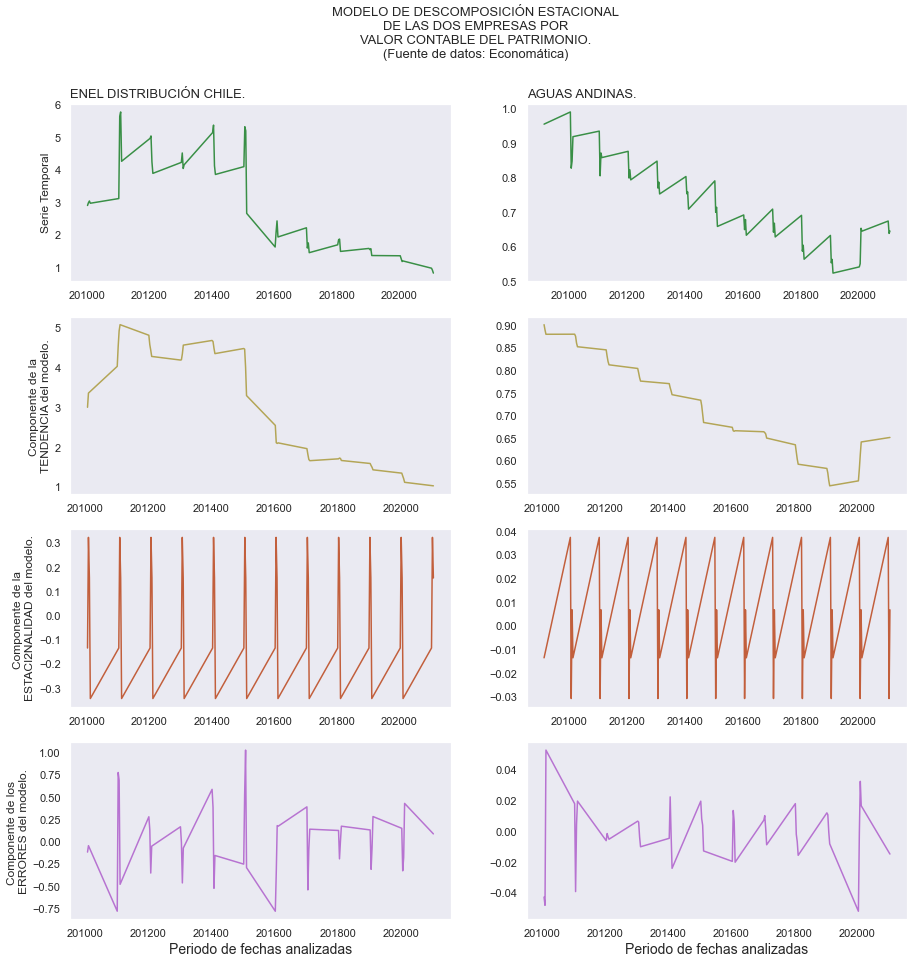

In [37]:
fig, axs = plt.subplots(4,2, figsize = (15, 15))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LAS DOS EMPRESAS POR\nVALOR CONTABLE DEL PATRIMONIO.\n(Fuente de datos: Economática)',
            fontsize = 13,
             y = 0.97,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

ENELDXCH.set_index('date').val_cont_pat.dropna().plot(color = '#398F46',
                                                          ax = axs[0,0],
                                                          fontsize = 11)

axs[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,0].set_xlabel(None)

axs[0,0].set_ylabel('Serie Temporal',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_ENE_VCP.trend.plot(color  = '#B3A556',
                         ax = axs[1,0],
                   fontsize = 11)

axs[1,0].set_xlabel(None)

axs[1,0].set_ylabel('Componente de la \nTENDENCIA del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_ENE_VCP.seasonal.plot(color  = '#C25F3C',
                            ax = axs[2,0],
                      fontsize = 11)

axs[2,0].set_xlabel(None)

axs[2,0].set_ylabel('Componente de la \nESTACI2NALIDAD del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_ENE_VCP.resid.plot(color  = '#B773D1',
                         ax = axs[3,0],
                   fontsize = 11)

axs[3,0].set_xlabel(None)

axs[3,0].set_ylabel('Componente de los \nERRORES del modelo.',
                 fontsize = 12)

axs[3,0].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)
# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

AGUAS_A.set_index('date').val_cont_pat.dropna().plot(color = '#398F46',
                                                        ax = axs[0,1],
                                                  fontsize = 11)

axs[0,1].set_title('AGUAS ANDINAS.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_AGUAS_VCP.trend.plot(color  = '#B3A556',
                           ax = axs[1,1],
                     fontsize = 11)

axs[1,1].set_xlabel(None)

axs[1,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_AGUAS_VCP.seasonal.plot(color  = '#C25F3C',
                              ax = axs[2,1],
                        fontsize = 11)

axs[2,1].set_xlabel(None)

axs[2,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_AGUAS_VCP.resid.plot(color  = '#B773D1',
                           ax = axs[3,1],
                     fontsize = 11)

axs[3,1].set_xlabel(None)

axs[3,1].set_ylabel(None)

axs[3,1].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)

plt.show()

#### <center> *La descomposición estacional del VALOR CONTABLE DEL PATRIMONIO nos entrega la siguiente información, con respecto a la tendencia para ambos modelos es clara y muy similar a la serie sin descomponer las dos van a la baja, la estacionalidad para ambas es perfecta, en los errores los dos modelos presentan demasiados errores lo que nos indica no muy buenas predicciones.*

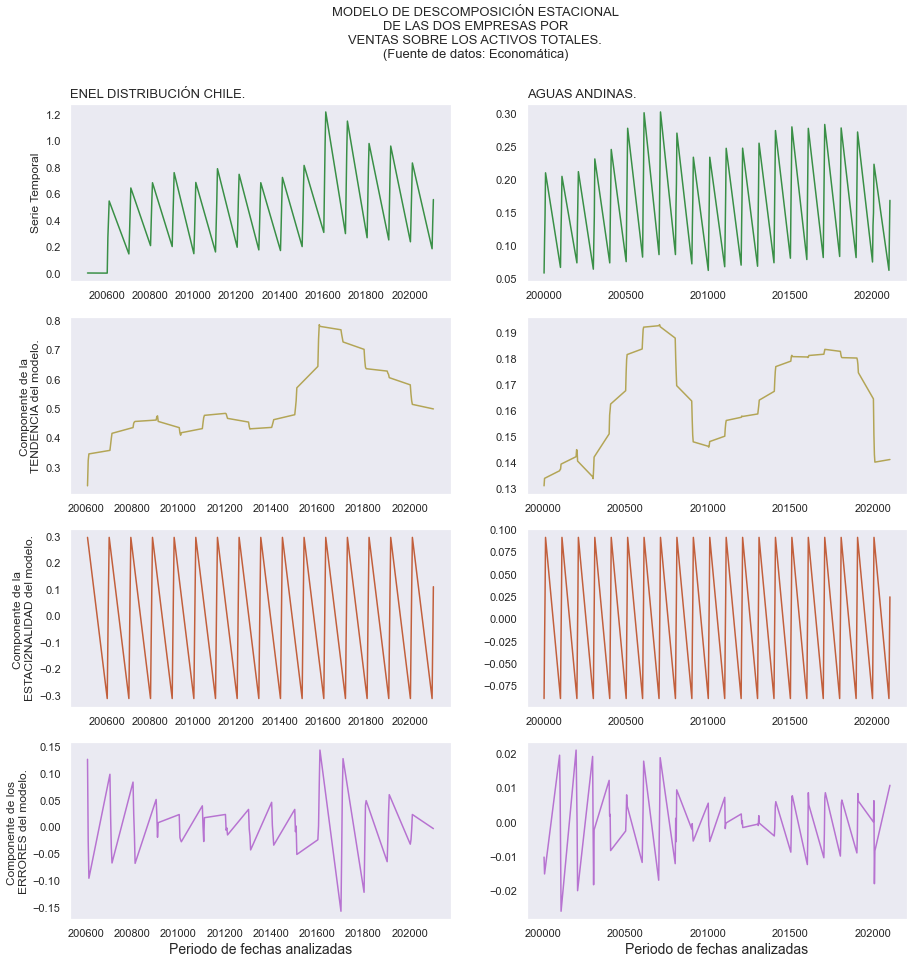

In [38]:
fig, axs = plt.subplots(4,2, figsize = (15, 15))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LAS DOS EMPRESAS POR\nVENTAS SOBRE LOS ACTIVOS TOTALES.\n(Fuente de datos: Economática)',
            fontsize = 13,
             y = 0.97,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

ENELDXCH.set_index('date').vent_act_tot.dropna().plot(color = '#398F46',
                                                          ax = axs[0,0],
                                                          fontsize = 11)

axs[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,0].set_xlabel(None)

axs[0,0].set_ylabel('Serie Temporal',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_ENE_VAT.trend.plot(color  = '#B3A556',
                         ax = axs[1,0],
                   fontsize = 11)

axs[1,0].set_xlabel(None)

axs[1,0].set_ylabel('Componente de la \nTENDENCIA del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_ENE_VAT.seasonal.plot(color  = '#C25F3C',
                            ax = axs[2,0],
                      fontsize = 11)

axs[2,0].set_xlabel(None)

axs[2,0].set_ylabel('Componente de la \nESTACI2NALIDAD del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_ENE_VAT.resid.plot(color  = '#B773D1',
                         ax = axs[3,0],
                   fontsize = 11)

axs[3,0].set_xlabel(None)

axs[3,0].set_ylabel('Componente de los \nERRORES del modelo.',
                 fontsize = 12)

axs[3,0].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)
# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

AGUAS_A.set_index('date').vent_act_tot.dropna().plot(color = '#398F46',
                                                        ax = axs[0,1],
                                                  fontsize = 11)

axs[0,1].set_title('AGUAS ANDINAS.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_AGUAS_VAT.trend.plot(color  = '#B3A556',
                           ax = axs[1,1],
                     fontsize = 11)

axs[1,1].set_xlabel(None)

axs[1,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_AGUAS_VAT.seasonal.plot(color  = '#C25F3C',
                              ax = axs[2,1],
                        fontsize = 11)

axs[2,1].set_xlabel(None)

axs[2,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_AGUAS_VAT.resid.plot(color  = '#B773D1',
                           ax = axs[3,1],
                     fontsize = 11)

axs[3,1].set_xlabel(None)

axs[3,1].set_ylabel(None)

axs[3,1].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)

plt.show()

#### <center> *La descomposición estacional de las VENTAS SOBRE LOS ACTIVOS TOTALES nos entrega la siguiente información, con respecto a la tendencia para los dos modelos nose aprecia con claridad pero se puede ver un alza en ENEL aunque al final tiende a bajar y AGUAS ANDINAS no presenta, la estacionalidad para ambas es perfecta, en los errores los modelos tienden a equivocarse menos en los periodos intermedios.*

### Agregaremos a la base de datos el indicador Z-SCORE de ALTMAN.

In [40]:
datos = datos.assign(\
                         util_por_act = lambda x:(x['pretaxincome'] / x['totalassets']),\
                          z_score_alt = lambda x:(x['cap_circ']*1.2 +
                                                  x['retorno_neto_de_activos']*1.4 + \
                                                  x['util_por_act']*3.3 + \
                                                  x['val_cont_pat']*0.6 + \
                                                  x['vent_act_tot'])
                    )

### Reemplazamos los valores que hubieran resultado infinito de las nuevas variables calculadas con NAN. 

In [41]:
datos.replace([np.inf, -np.inf], np.nan, inplace = True)

### Agregaremos las nuevas variables a las empresas ya selecionadas.

In [42]:
ENELDXCH = datos[datos['tic'] == 'ENELDXCH'].sort_values('date')
AGUAS_A = datos[datos['tic'] == 'AGUAS-A'].sort_values('date')

### Gráficaremos las series de tiempo del indicador de Z-SCORE de ALTMAN para cada empresa.

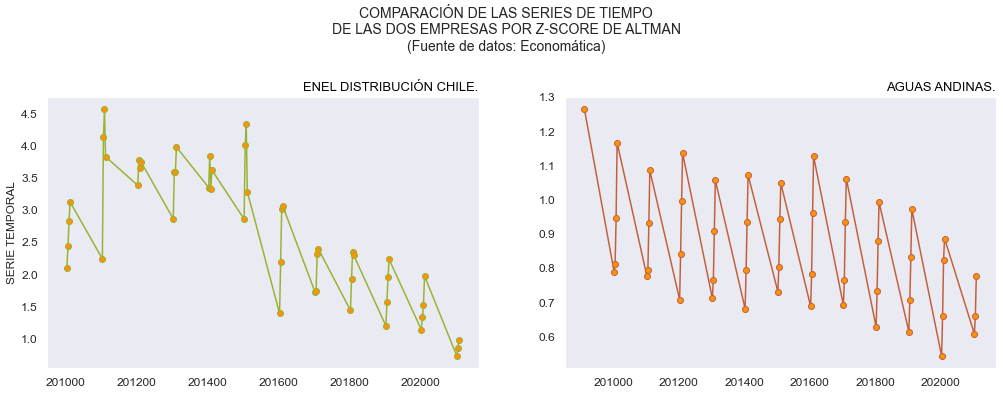

In [43]:
fig, axes = plt.subplots(1,2, figsize = (17,5))

fig.suptitle('COMPARACIÓN DE LAS SERIES DE TIEMPO\nDE LAS DOS EMPRESAS POR Z-SCORE DE ALTMAN\n(Fuente de datos: Economática)',
            fontsize = 14,
            y = 1.13)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# Z-SCORE DE ALTMAN
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE

ENELDXCH.plot('date', 
              'z_score_alt',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#98B332',
               legend = None,
               fontsize = 12,
               ax = axes[0]
              )
axes[0].set_title('ENEL DISTRIBUCIÓN CHILE.',
          color = '#000407',
          fontsize = 13,
          loc = 'right')

axes[0].set_xlabel(None)

axes[0].set_ylabel('SERIE TEMPORAL',
                     fontsize = 11.8)
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS

AGUAS_A.plot('date', 
              'z_score_alt',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#C2603C',
               legend = None,
               fontsize = 12,
               ax = axes[1]
              )

axes[1].set_title('AGUAS ANDINAS.',
          color = '#000407',
          fontsize = 13,
          loc = 'right',
         )
axes[1].set_xlabel(None)

plt.show()

#### <center> *Para las series temporales del indicador del Z-SCORE de ALTMAN para vemos que para la mitad del periodo tiende a ser mas estable y depues se ve una tendencia a la baja, en cambio para AGUAS ANDINAS se ve un comportamiento más ciclico.*

### Realizaremos la descomposición de la serie temporal del indicador Z-SCORE de ALTMAN por cada empresa.

In [44]:
# ---------------------------------------------------------------------------------------------
# Descomposición estacional de la serie de tiempo del Z-SCORE DE ALTMAN.
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
DE_ENE_ZSA = sm.tsa.seasonal_decompose(ENELDXCH.set_index('date').z_score_alt.dropna(),
                                    model = 'additive', period = 4)
# AGUAS ANDINAS
DE_AGUAS_ZSA = sm.tsa.seasonal_decompose(AGUAS_A.set_index('date').z_score_alt.dropna(),
                                       model = 'additive', period = 4) 

### Gráficaremos cada componente del modelo de descomposición estacional de cada empresa.

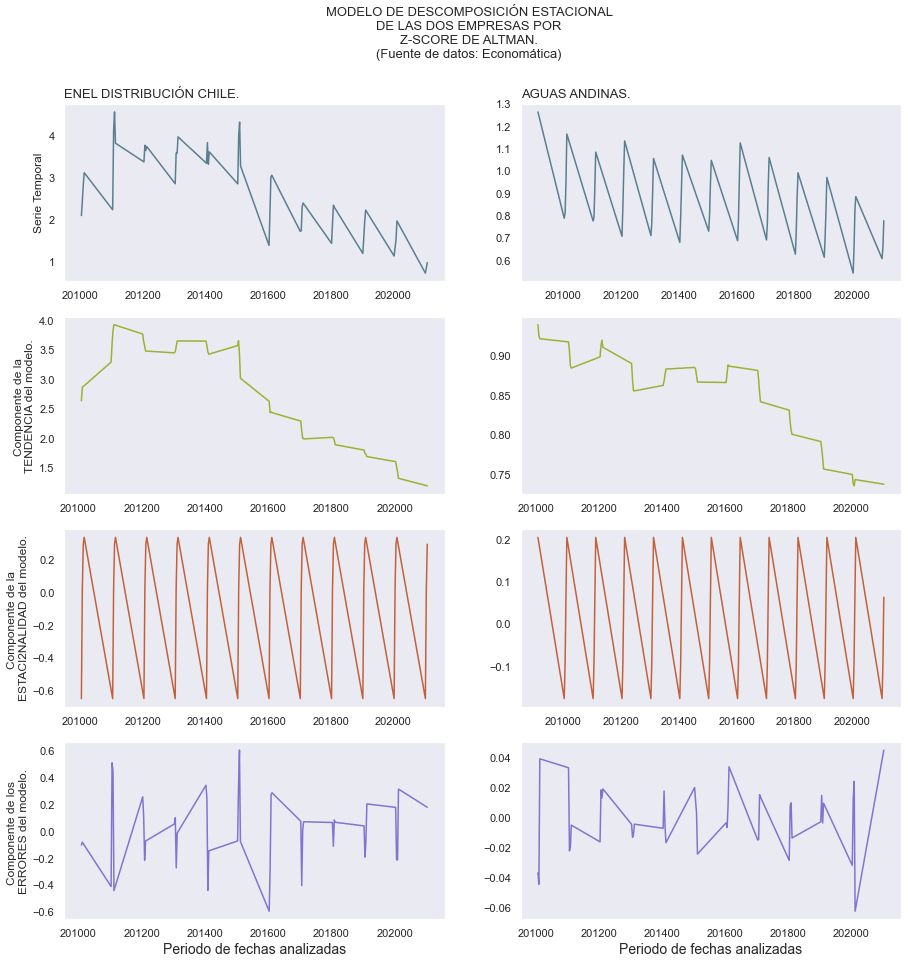

In [45]:
fig, axs = plt.subplots(4,2, figsize = (15, 15))

plt.suptitle('MODELO DE DESCOMPOSICIÓN ESTACIONAL\nDE LAS DOS EMPRESAS POR\nZ-SCORE DE ALTMAN.\n(Fuente de datos: Economática)',
            fontsize = 13,
             y = 0.97,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# ENEL DISTRIBUCIÓN CHILE
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

ENELDXCH.set_index('date').z_score_alt.dropna().plot(color = '#597E8F',
                                                          ax = axs[0,0],
                                                          fontsize = 11)

axs[0,0].set_title('ENEL DISTRIBUCIÓN CHILE.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,0].set_xlabel(None)

axs[0,0].set_ylabel('Serie Temporal',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_ENE_ZSA.trend.plot(color  = '#98B332',
                         ax = axs[1,0],
                   fontsize = 11)

axs[1,0].set_xlabel(None)

axs[1,0].set_ylabel('Componente de la \nTENDENCIA del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_ENE_ZSA.seasonal.plot(color  = '#C2603C',
                            ax = axs[2,0],
                      fontsize = 11)

axs[2,0].set_xlabel(None)

axs[2,0].set_ylabel('Componente de la \nESTACI2NALIDAD del modelo.',
                 fontsize = 12)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_ENE_ZSA.resid.plot(color  = '#8273D1',
                         ax = axs[3,0],
                   fontsize = 11)

axs[3,0].set_xlabel(None)

axs[3,0].set_ylabel('Componente de los \nERRORES del modelo.',
                 fontsize = 12)

axs[3,0].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)
# ---------------------------------------------------------------------------------------------
# RENTABILIDAD SOBRE LOS ACTIVOS TOTALES
# ---------------------------------------------------------------------------------------------
# AGUAS ANDINAS
# ---------------------------------------------------------------------------------------------
# Gráfico de los datos sin desestacionalizar (Serie Temporal).

AGUAS_A.set_index('date').z_score_alt.dropna().plot(color = '#597E8F',
                                                        ax = axs[0,1],
                                                  fontsize = 11)

axs[0,1].set_title('AGUAS ANDINAS.',
                     loc    = 'left',
                   fontsize = 13)

axs[0,1].set_xlabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la TENDENCIA.

DE_AGUAS_ZSA.trend.plot(color  = '#98B332',
                           ax = axs[1,1],
                     fontsize = 11)

axs[1,1].set_xlabel(None)

axs[1,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de la ESTACIONALIDAD.

DE_AGUAS_ZSA.seasonal.plot(color  = '#C2603C',
                              ax = axs[2,1],
                        fontsize = 11)

axs[2,1].set_xlabel(None)

axs[2,1].set_ylabel(None)
# ---------------------------------------------------------------------------------------------
# Gráfico de los ERRORES.

DE_AGUAS_ZSA.resid.plot(color  = '#8273D1',
                           ax = axs[3,1],
                     fontsize = 11)

axs[3,1].set_xlabel(None)

axs[3,1].set_xlabel('Periodo de fechas analizadas',
                    fontsize = 14)

plt.show()

#### <center>*La componente de tendencia para ambos modelos nos indica ir a la baja esta componente se parece más a la serie temporal en la empresa ENEL, la estacionalidad es perfecta para ambos modelos, en los errores se ve mucha varianza para ambos modelos lo cual nos indica mucho error en la predicción.*

### *La empresa que tiene indices más bajo de Z-SCORE es AGUAS ANDINAS por lo cual es la que esta con mayor riesgo de quiebra, debido a esto se toma el riesgo de invertir en ENEL aunque su indicador es bajo pero mayor a los de AGUAS ANDINAS.*